In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


Attempting to model the prediction of NBA all-star selection with advanced stats from the basketball-reference web page (https://www.basketball-reference.com/)


Previous to the python processing and datacleaning, ghost tables and empty spaces were removed as the .csv(UTF-8 coded) was created

In [23]:
NBAseasons = ['17_18', '18_19','19_20','20_21', '21_22']
#list of all NBA all-stars for the last 3 seasons
allstars21_22 = ['Giannis Antetokounmpo21_22','LeBron James21_22','Kevin Durant21_22','Anthony Davis21_22','James Harden21_22','Nikola Jokic21_22','Joel Embiid21_22','Stephen Curry21_22','Ja Morant21_22','DeMar DeRozan21_22','Jayson Tatum21_22','Trae Young21_22','Andrew Wiggins21_22','Devin Booker21_22','Luka Doncic21_22','Karl-Anthony Towns21_22','Darius Garland21_22','Zach LaVine21_22','Chris Paul21_22','Dejounte Murray21_22','Jimmy Butler21_22','Khris Middleton21_22','Donovan Mitchell21_22','LaMelo Ball21_22','Fred VanVleet21_22','Rudy Gobert21_22']
allstars20_21 = ['Giannis Antetokounmpo20_21','LeBron James20_21', 'Kevin Durant20_21', 'Kyrie Irving20_21','Stephen Curry20_21','Joel Embiid20_21','Luka Doncic20_21','Kawhi Leonard20_21','Nikola Jokić20_21','Bradley Beal20_21','Jayson Tatum20_21','James Harden20_21','Damian Lillard20_21','Devin Booker20_21','Ben Simmons20_21','Zion Williamson20_21','Chris Paul20_21','Zach LaVine20_21','Jaylen Brown20_21','Julius Randle20_21','Paul George20_21','Nikola Vucevic20_21','Domantas Sabonis20_21','Donovan Mitchell20_21','Rudy Gobert20_21']
allstars19_20 = ['Giannis Antetokounmpo19_20', 'LeBron James19_20', "Anthony Davis19_20","Joel Embiid19_20","Kawhi Leonard19_20","Pascal Siakam19_20","Luka Dončić19_20","Kemba Walker19_20","James Harden19_20","Trae Young19_20","Khris Middleton19_20","Damian Lillard19_20","Bam Adebayo19_20","Ben Simmons19_20","Rudy Gobert19_20","Nikola Jokić19_20","Jimmy Butler19_20","Jayson Tatum19_20","Kyle Lowry19_20","Chris Paul19_20","Brandon Ingram19_20","Russell Westbrook19_20","Donovan Mitchell19_20","Domantas Sabonis19_20","Devin Booker19_20"]
allstars18_19 = ["Kevin Durant18_19","Stephen Curry18_19","Kyrie Irving18_19","Joel Embiid18_19","Kawhi Leonard18_19","Paul George18_19","James Harden18_19","Kemba Walker18_19","Khris Middleton18_19","Anthony Davis18_19","Nikola Jokić18_19","Klay Thompson18_19","Ben Simmons18_19","Damian Lillard18_19","Blake Griffin18_19","Russell Westbrook18_19","LaMarcus Aldridge18_19","Nikola Vučević18_19","Karl-Anthony Towns18_19","Kyle Lowry18_19","Bradley Beal18_19"]
allstars17_18 = ["Kyrie Irving17_18","DeMar DeRozan17_18","LeBron James17_18","Giannis Antetokounmpo17_18","Joel Embiid17_18","Bradley Beal17_18","Goran Dragić17_18","Al Horford17_18","Kevin Love17_18","Kyle Lowry17_18","Victor Oladipo17_18","Stephen Curry17_18","James Harden17_18","Kevin Durant17_18","Anthony Davis17_18","DeMarcus Cousins17_18","Russell Westbrook17_18","Damian Lillard17_18","Draymond Green17_18","Karl-Anthony Towns17_18","LaMarcus Aldridge17_18","Klay Thompson17_18","Jimmy Butler17_18","Paul George17_18"]


for season in NBAseasons:
    df = pd.read_csv("C:\\Users\\nunoe\\OneDrive\\Ambiente de Trabalho\\NBA\\NBA_Players_AllstarModel\\Players"+season+".csv")
    ####add year to the end of the name of the player for all-star crossing purposes
    df['Player'] = df['Player'] + season
    ####match player name to all-star list:
    df['Allstar'] = df['Player'].isin(allstars21_22) | df['Player'].isin(allstars20_21) | df['Player'].isin(allstars19_20) | df['Player'].isin(allstars18_19)
    ####encoding categorical variable
    df['Allstar'] = df['Allstar'].astype(int)    
    ####save the data to season specific csv files
    df.to_csv("C:\\Users\\nunoe\\OneDrive\\Ambiente de Trabalho\\NBA\\NBA_Players_AllstarModel\\Players"+season+"_fixed.csv", index=False)

In [24]:
####merge all the dataframes looping through the list of seasons
for season in NBAseasons:
    if season == '17_18':
        df = pd.read_csv("C:\\Users\\nunoe\\OneDrive\\Ambiente de Trabalho\\NBA\\NBA_Players_AllstarModel\\Players"+season+"_fixed.csv")
    else:
        df2 = pd.read_csv("C:\\Users\\nunoe\\OneDrive\\Ambiente de Trabalho\\NBA\\NBA_Players_AllstarModel\\Players"+season+"_fixed.csv")
        df = pd.concat([df, df2], axis=0)


####drop columns that are not needed for the model
df.drop(['Age','Pos','Tm','Player'], axis=1, inplace=True)
#drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

Rk         0
G          0
MP         0
PER        0
TS%        0
3PAr       0
FTr        0
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
Allstar    0
dtype: int64

<AxesSubplot: >

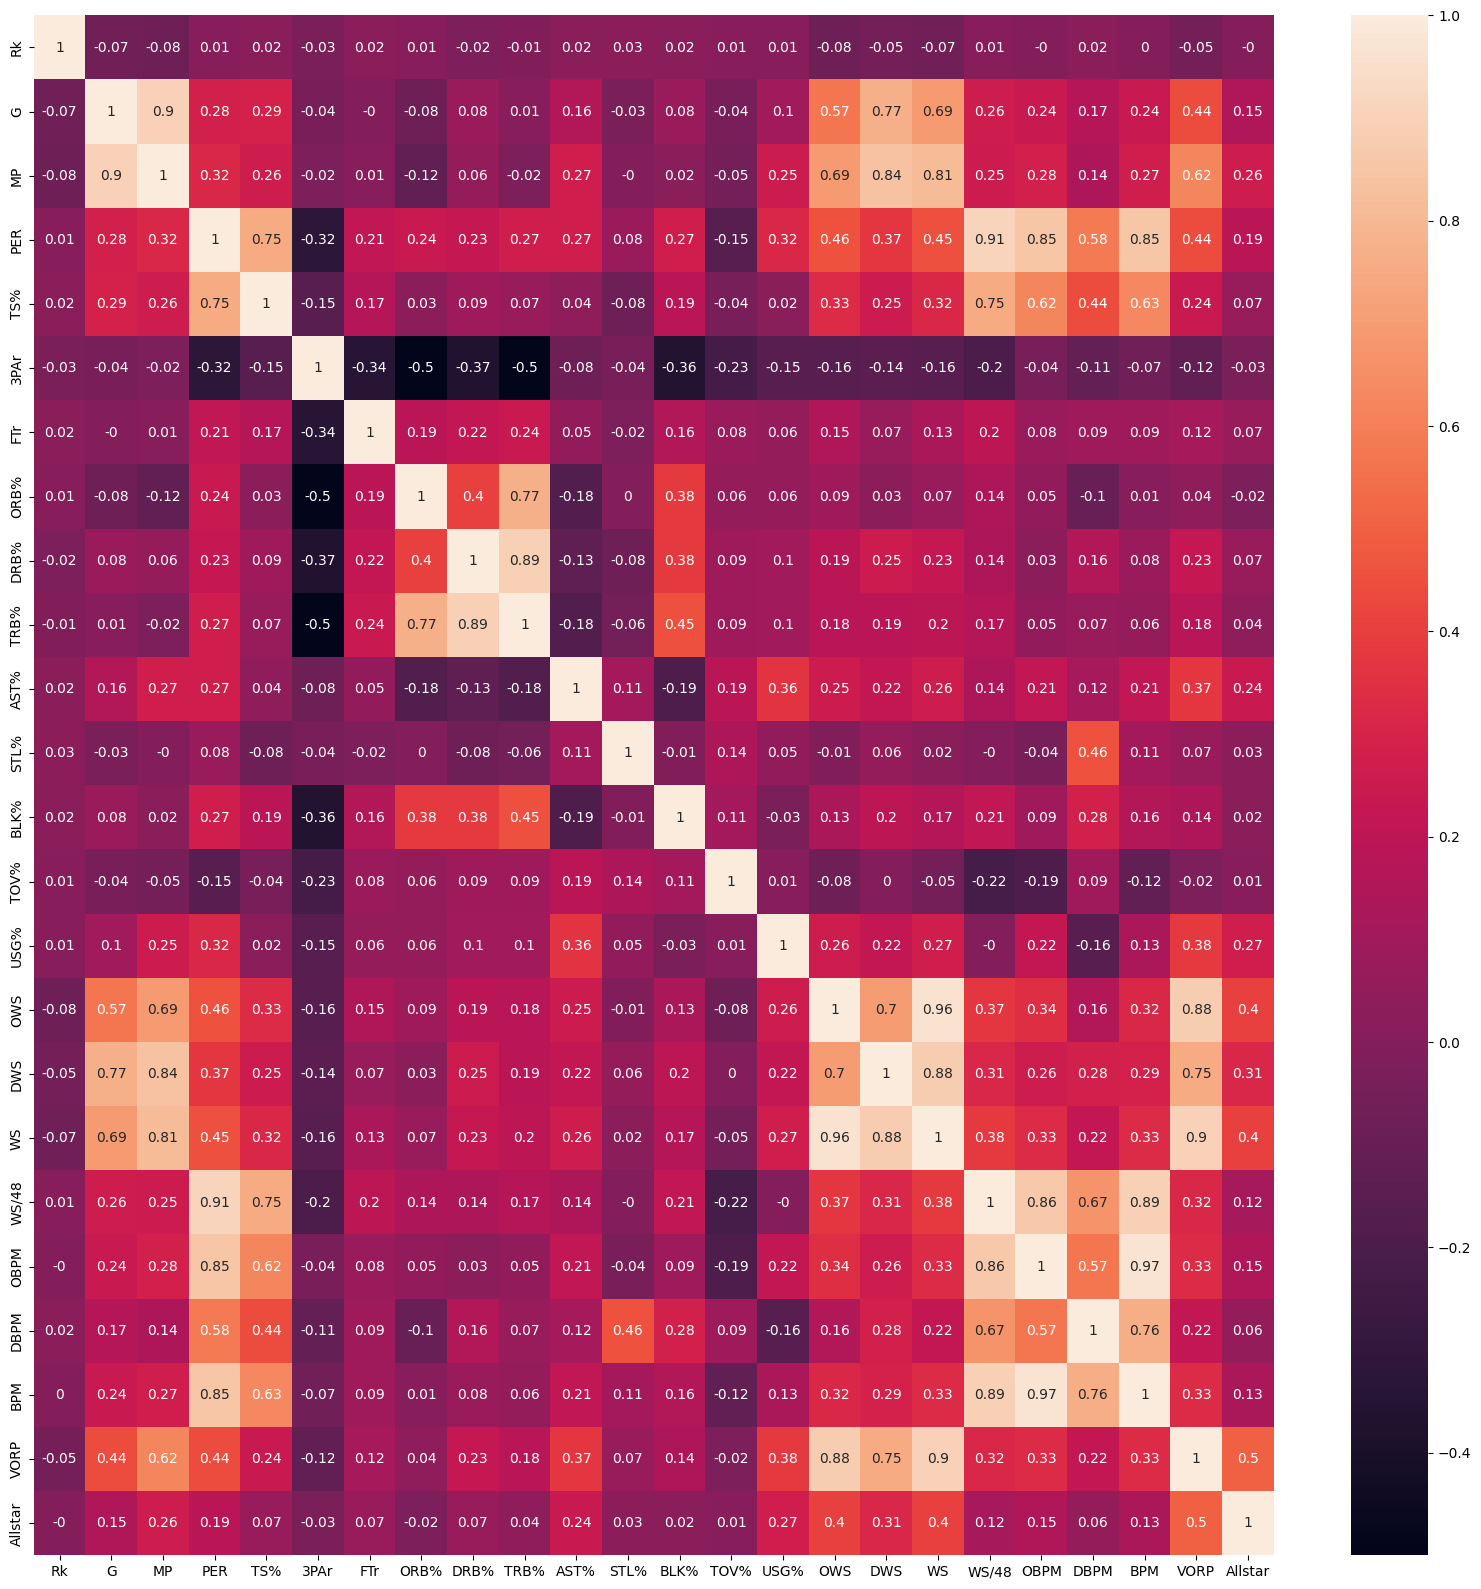

In [25]:
####correlation matrix plot
plt.figure(figsize=(20,20))
corr = df.corr()
corr = corr.round(2)
sns.heatmap(corr,   xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [26]:
####Split into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state = 25)
train_features = train.drop(['Allstar'], axis=1)
train_labels = train['Allstar']
test_features = test.drop(['Allstar'], axis=1)
test_labels = test['Allstar']

In [27]:
####train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state = 25)
rf.fit(train_features, train_labels)
rf_pred = rf.predict(test_features)
print(roc_auc_score(test_labels, rf_pred))

0.7691643273591017


<AxesSubplot: xlabel='Allstar', ylabel='Player'>

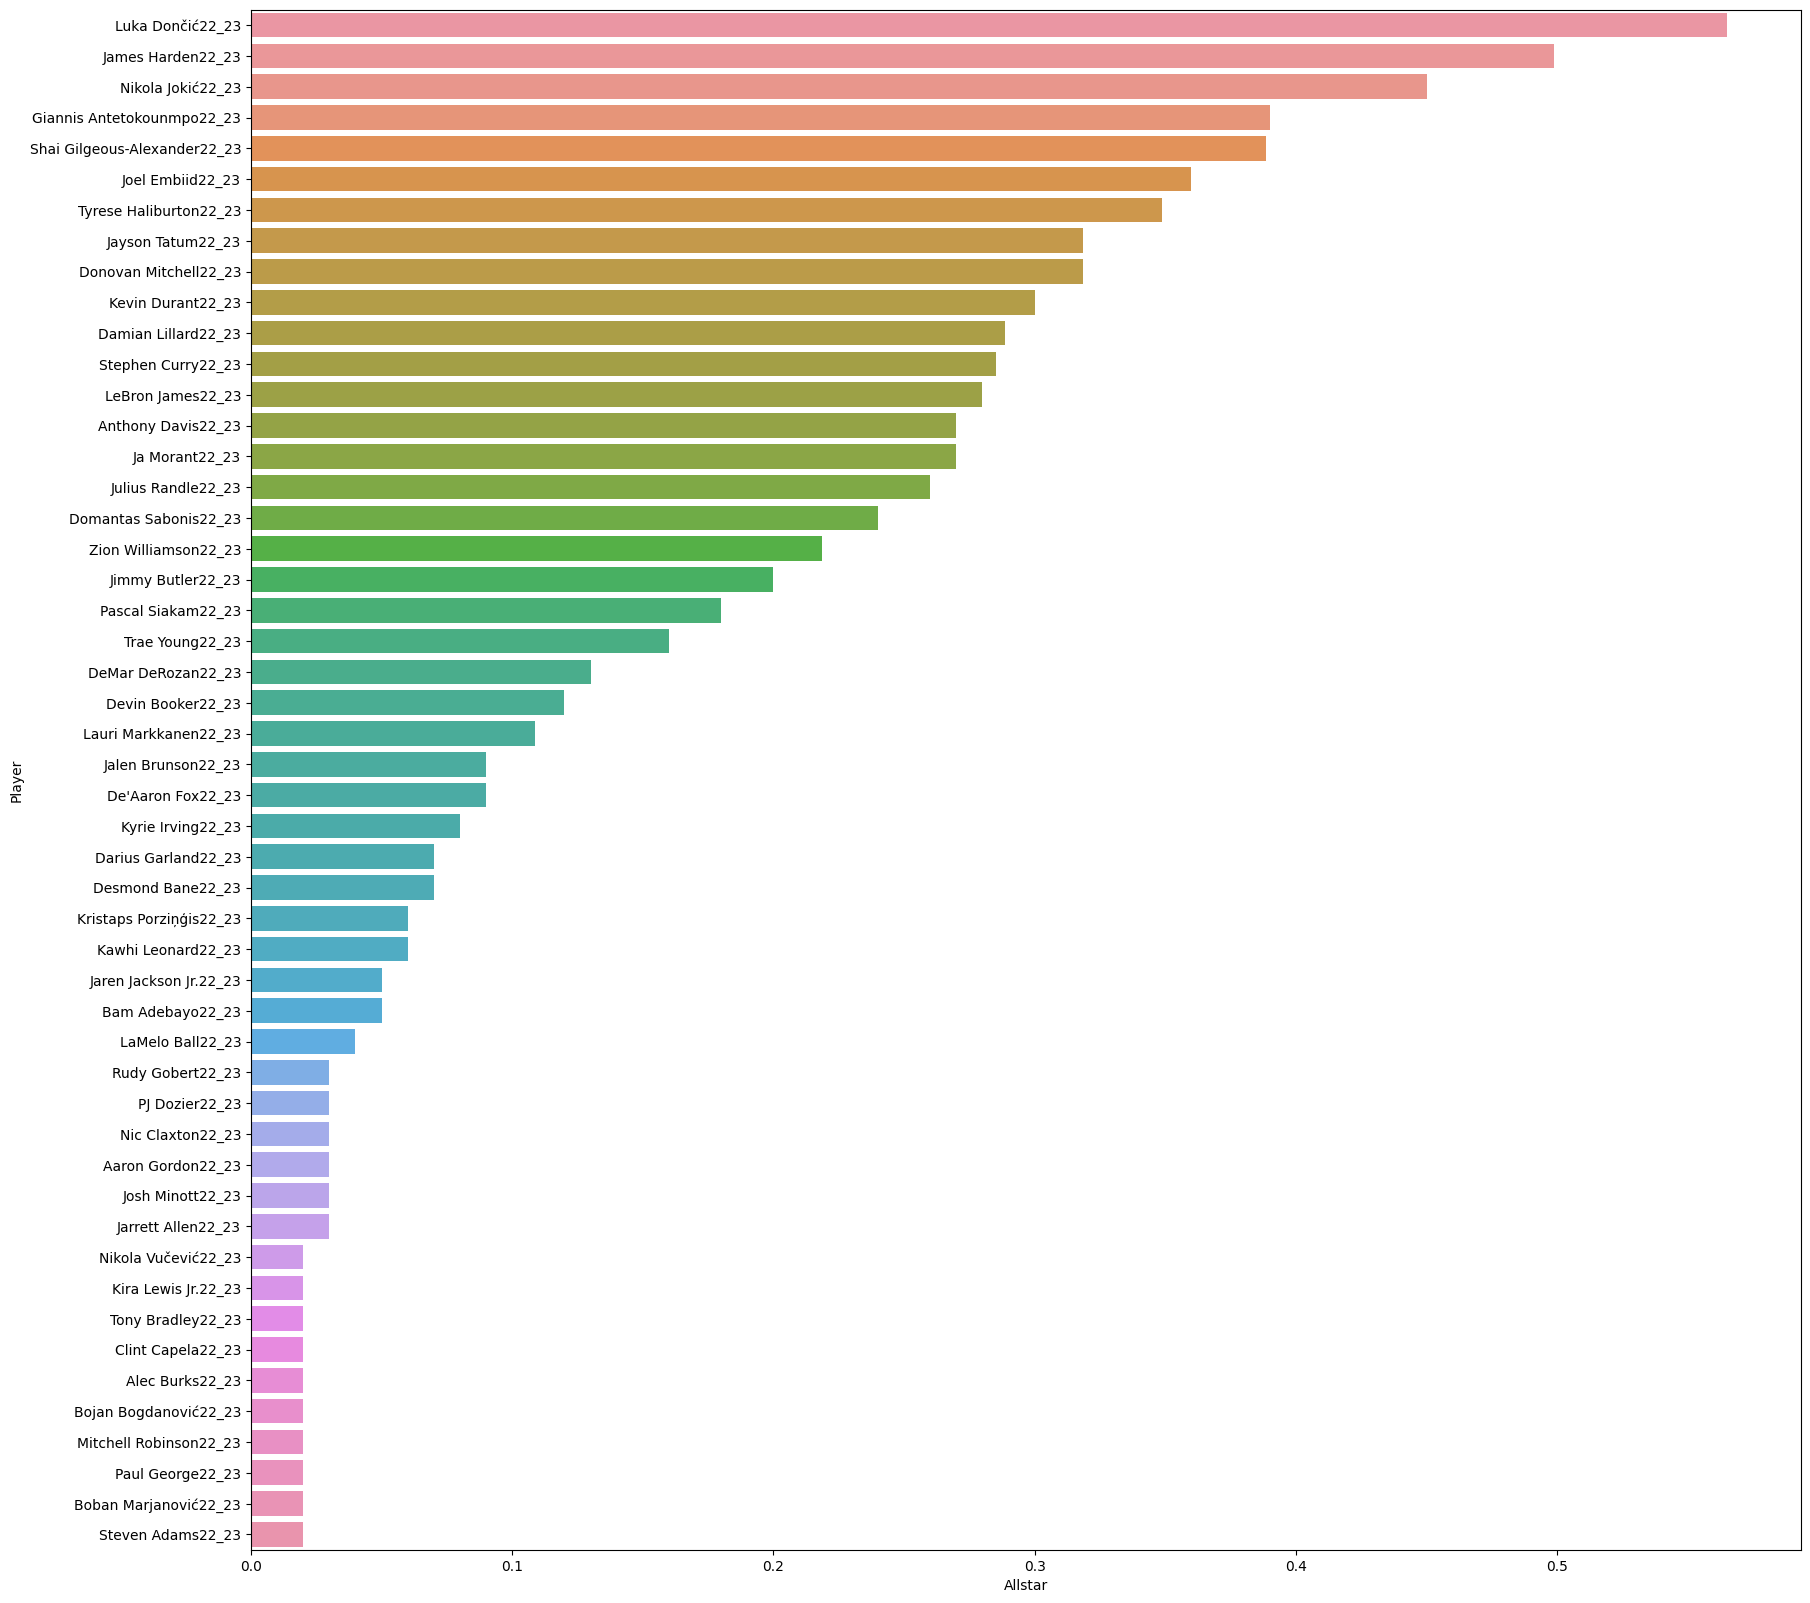

In [28]:
####Input current season stats for prediction
df = pd.read_csv("C:\\Users\\nunoe\\OneDrive\\Ambiente de Trabalho\\NBA\\NBA_Players_AllstarModel\\Players22_23.csv")
df['Player'] = df['Player'] + '22_23'
df.drop(['Tm','Age','Pos'], axis=1, inplace=True)
df.dropna(inplace=True)
dfcopy = df.drop(['Player'], axis=1)

#predict the all-star probability add the prediction to the dataframe
rf_pred = rf.predict_proba(dfcopy)[:,1]
df['Allstar'] = rf_pred

#merge the prediction with the original dataframe eliminate collumns with _y
dfNew = df.merge(dfcopy, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

dfNew.drop(dfNew.filter(regex='_y$').columns, axis=1, inplace=True)

#order the dataframe by the prediction
dfNew.sort_values(by=['Allstar'], ascending=False, inplace=True)

#plot the prediction
plt.figure(figsize=(20,20))
sns.barplot(x='Allstar', y='Player', data=dfNew.head(50))
